In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

plt.style.use('default')

In [3]:
# assumes .env file is in working directory
db_url = ! source .env; echo ${DATABASE_URL}
db_url = db_url[0]

In [4]:
# Create an engine instance
alchemyEngine = create_engine(db_url)

# Connect to PostgreSQL server
dbConnection = alchemyEngine.connect()

# Read data from PostgreSQL database table and load into a DataFrame instance
bci_collection = pd.read_sql("SELECT * FROM bci_collection", dbConnection)

# Print the DataFrame
print(bci_collection)

    id                                  bci_configuration collector_name  \
0    1  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...            aaa   
1    2  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...        Michael   
2    3  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...              s   
3    4  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...              s   
4    5  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...              s   
..  ..                                                ...            ...   
83  84  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...            S02   
84  85  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...            S02   
85  86  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...            S02   
86  87  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...            S02   
87  88  <?xml version="1.0"?>\n<info>\n\t<name>obci_ee...            S02   

   collection_start_time collection_end_time  
0                   None                

In [52]:
# # this counts the number of rows for each subject
# # takes a while to run

# for name in bci_collection['collector_name'].drop_duplicates():
#     collection_ids = bci_collection.loc[bci_collection['collector_name'] == name, 'id']
#     collection_ids_nonempty = []
#     total_count = 0
#     for id in collection_ids:

#         count = pd.read_sql(
#             f"SELECT COUNT(*) FROM collected_data WHERE collection_id = {id}",
#             dbConnection,
#         ).iloc[0,0]

#         if count > 0:
#             collection_ids_nonempty.append(id)

#         total_count += count

#     if len(collection_ids_nonempty) > 0:
#         print(f'{name} ({total_count}):\t{collection_ids_nonempty}')


S02 (520440):	[18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 39, 40, 41, 44]
S04 (311850):	[31, 32, 74, 75, 76, 77, 78, 79]
S05 (234100):	[33, 34, 35, 36, 37, 38]
S06 (383303):	[50, 51, 52, 53, 54, 56, 57, 58, 59, 60]
S07 (233900):	[61, 62, 63, 64, 65, 66]
S08 (233820):	[68, 69, 70, 71, 72, 73]


In [7]:
subject_id = 'S02'
collection_ids = bci_collection.loc[bci_collection['collector_name'] == subject_id, 'id'].drop_duplicates()
print(collection_ids)

17    18
18    19
19    20
20    21
23    24
24    25
25    26
26    27
27    28
28    29
38    39
39    40
40    41
41    42
42    43
43    44
79    80
80    81
81    82
82    83
83    84
84    85
85    86
86    87
87    88
Name: id, dtype: int64


In [8]:
# takes up to ~30 seconds to run

subject_data = []
# collection_ids = ['43']

for collection_id in collection_ids:

    df = pd.read_sql(
        f"SELECT * FROM collected_data WHERE collection_id = {collection_id}",
         dbConnection
    )

    n_rows_per_character = df['character'].value_counts()
    print(f'Total number of rows: {df.shape[0]}')
    print(f'{len(n_rows_per_character)} characters for collection ID {collection_id}')
    print(f'Average number of rows per character: {n_rows_per_character.mean():.0f}')
    print('-----')

    subject_data.append(df)
    

Total number of rows: 38980
31 characters for collection ID 18
Average number of rows per character: 1257
-----
Total number of rows: 38980
31 characters for collection ID 19
Average number of rows per character: 1257
-----
Total number of rows: 38920
31 characters for collection ID 20
Average number of rows per character: 1255
-----
Total number of rows: 38990
31 characters for collection ID 21
Average number of rows per character: 1258
-----
Total number of rows: 38960
31 characters for collection ID 24
Average number of rows per character: 1257
-----
Total number of rows: 38950
31 characters for collection ID 25
Average number of rows per character: 1256
-----
Total number of rows: 38960
31 characters for collection ID 26
Average number of rows per character: 1257
-----
Total number of rows: 38980
31 characters for collection ID 27
Average number of rows per character: 1257
-----
Total number of rows: 39040
31 characters for collection ID 28
Average number of rows per character: 125

1260    21
1250     9
1270     1
dtype: int64


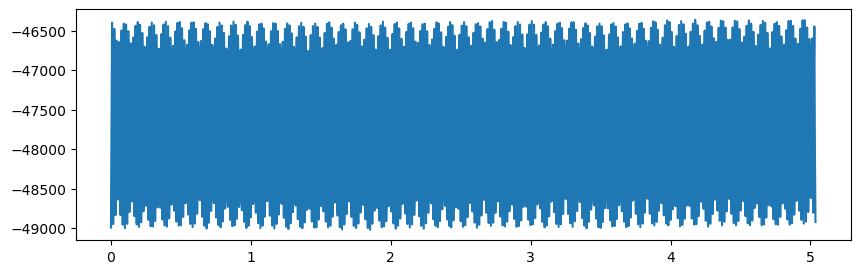

In [7]:
i_session = 0
channel_name = 'channel_5'
character = 'z'
fs = 250

session_data = subject_data[i_session]

n_sample_per_character = session_data.groupby('character').size()
print(n_sample_per_character.value_counts())

fig, ax = plt.subplots(figsize=(10,3))
trial_data = session_data.loc[session_data['character'] == character].sort_values('order')
ax.plot(np.arange(len(trial_data))/fs, trial_data[channel_name])
